In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df =pd.read_csv('world_population.csv')


In [7]:
df.info()
# Observations: The number of non-null values is 234 countries for the first parameters
# Then you have a few missing values depending on the year of the population

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [20]:
# pd.set_option('display.float_format',lambda x: '%.0f' % x)      # Alex version
# We change the format to display data as float without decimals and with thousand separators for better reading
pd.options.display.float_format = '{:,.0f}'.format
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,"41,128,771","38,972,230","33,753,499","28,189,672","19,542,982","10,694,796","12,486,631","10,752,971","652,230",63,1,1
1,138,ALB,Albania,Tirana,Europe,"2,842,321","2,866,849","2,882,481","2,913,399","3,182,021","3,295,066","2,941,651","2,324,731","28,748",99,1,0
2,34,DZA,Algeria,Algiers,Africa,"44,903,225","43,451,666","39,543,154","35,856,344","30,774,621","25,518,074","18,739,378","13,795,915","2,381,741",19,1,1
3,213,ASM,American Samoa,Pago Pago,Oceania,"44,273","46,189","51,368","54,849","58,230","47,818","32,886","27,075",199,222,1,0
4,203,AND,Andorra,Andorra la Vella,Europe,"79,824","77,700","71,746","71,519","66,097","53,569","35,611","19,860",468,171,1,0


In [24]:
df.describe()
# One country has the minimum count of 510 inhabitants, whereas the max has almost 1.5 billion people in 2022 China
# The mean is 34 million people per country in 2022

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234,230,233,230,227,227,229,229,230,232,230,232,234
mean,118,"34,632,251","33,600,711","32,066,004","30,270,164","26,840,495","19,330,464","16,282,885","15,866,499","581,664",457,1,0
std,68,"137,889,172","135,873,197","131,507,146","126,074,184","113,352,455","81,309,625","69,345,466","68,355,860","1,769,133","2,084",0,2
min,1,510,520,564,596,651,700,733,752,1,0,1,0
25%,59,"419,738","406,471","394,295","382,726","329,470","261,928","223,752","145,880","2,567",37,1,0
50%,118,"5,762,857","5,456,681","5,244,415","4,889,741","4,491,202","3,785,847","3,135,123","2,511,718","77,141",95,1,0
75%,176,"22,653,719","21,522,626","19,730,854","16,825,852","15,625,467","11,882,762","9,817,257","8,817,329","414,643",237,1,0
max,234,"1,425,887,337","1,424,929,781","1,393,715,448","1,348,191,368","1,264,099,069","1,153,704,252","982,372,466","822,534,450","17,098,242","23,172",1,18


In [28]:
df.isnull().sum()
# looking for the number of null values in each column which goes hand in hand with df.info()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                4
2020 Population                1
2015 Population                4
2010 Population                7
2000 Population                7
1990 Population                5
1980 Population                5
1970 Population                4
Area (km²)                     2
Density (per km²)              4
Growth Rate                    2
World Population Percentage    0
dtype: int64

In [30]:
df.nunique()
# looking for unique values in each columns, non unique values are null values for most

Rank                           234
CCA3                           234
Country                        234
Capital                        234
Continent                        6
2022 Population                230
2020 Population                233
2015 Population                230
2010 Population                227
2000 Population                227
1990 Population                229
1980 Population                229
1970 Population                230
Area (km²)                     231
Density (per km²)              230
Growth Rate                    178
World Population Percentage     70
dtype: int64

In [33]:
# Now let's manipulate the data itself to dig deeper 
# Let's see the biggest countries sorted by 2022 population
df.sort_values(by="2022 Population", ascending=False).head(10)
# China and India are each 18% of world population, so 36% all together

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,CHN,China,Beijing,Asia,"1,425,887,337","1,424,929,781","1,393,715,448","1,348,191,368","1,264,099,069","1,153,704,252","982,372,466","822,534,450","9,706,961",147,1,18
92,2,IND,India,New Delhi,Asia,"1,417,173,173","1,396,387,127","1,322,866,505","1,240,613,620","1,059,633,675",NaN,NaN,"557,501,301","3,287,590",431,1,18
221,3,USA,United States,"Washington, D.C.",North America,"338,289,857","335,942,003","324,607,776","311,182,845","282,398,554","248,083,732","223,140,018","200,328,340","9,372,610",36,1,4
93,4,IDN,Indonesia,Jakarta,Asia,"275,501,339","271,857,970","259,091,970","244,016,173","214,072,421","182,159,874","148,177,096","115,228,394","1,904,569",145,1,3
156,5,PAK,Pakistan,Islamabad,Asia,"235,824,862","227,196,741","210,969,298","194,454,498","154,369,924","115,414,069","80,624,057","59,290,872","881,912",267,1,3
149,6,NGA,Nigeria,Abuja,Africa,"218,541,212","208,327,405","183,995,785","160,952,853","122,851,984","95,214,257","72,951,439","55,569,264","923,768",237,1,3
27,7,BRA,Brazil,Brasilia,South America,"215,313,498","213,196,304","205,188,205","196,353,492","175,873,720","150,706,446","122,288,383","96,369,875","8,515,767",25,1,3
16,8,BGD,Bangladesh,Dhaka,Asia,"171,186,372","167,420,951","157,830,000","148,391,139","129,193,327","107,147,651","83,929,765","67,541,860","147,570","1,160",1,2
171,9,RUS,Russia,Moscow,Europe,"144,713,314","145,617,329","144,668,389","143,242,599","146,844,839","148,005,704","138,257,420","130,093,010","17,098,242",8,1,2
131,10,MEX,Mexico,Mexico City,North America,"127,504,125","125,998,302","120,149,897","112,532,401","97,873,442","81,720,428","67,705,186","50,289,306","1,964,375",65,1,2


In [42]:
# Now let's look at correlations to have a first glance with corr()
# Let's change the pandas display format to see 2 decimals at least for correlations
pd.options.display.float_format = '{:,.2f}'.format
# First, we need to select only the numeric columns for correlation
# Filter out non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()


# Alternatively, if you want to see which columns are causing the issue:
# print("Numeric columns:", df.select_dtypes(include=['float64', 'int64']).columns.tolist())
# print("Non-numeric columns:", df.select_dtypes(exclude=['float64', 'int64']).columns.tolist())

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Rank,1.00,-0.36,-0.36,-0.35,-0.35,-0.34,-0.33,-0.33,-0.34,-0.38,0.13,-0.22,-0.36
2022 Population,-0.36,1.00,1.00,1.00,1.00,0.99,0.99,0.99,0.97,0.45,-0.03,-0.02,1.00
2020 Population,-0.36,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.45,-0.03,-0.03,1.00
2015 Population,-0.35,1.00,1.00,1.00,1.00,1.00,0.99,0.99,0.98,0.46,-0.03,-0.03,1.00
2010 Population,-0.35,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,0.46,-0.03,-0.04,1.00
2000 Population,-0.34,0.99,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.47,-0.03,-0.05,0.99
1990 Population,-0.33,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,0.52,-0.03,-0.07,0.99
1980 Population,-0.33,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00,0.53,-0.03,-0.08,0.99
1970 Population,-0.34,0.97,0.98,0.98,0.98,0.99,1.00,1.00,1.00,0.51,-0.03,-0.08,0.97
Area (km²),-0.38,0.45,0.45,0.46,0.46,0.47,0.52,0.53,0.51,1.00,-0.06,-0.01,0.45


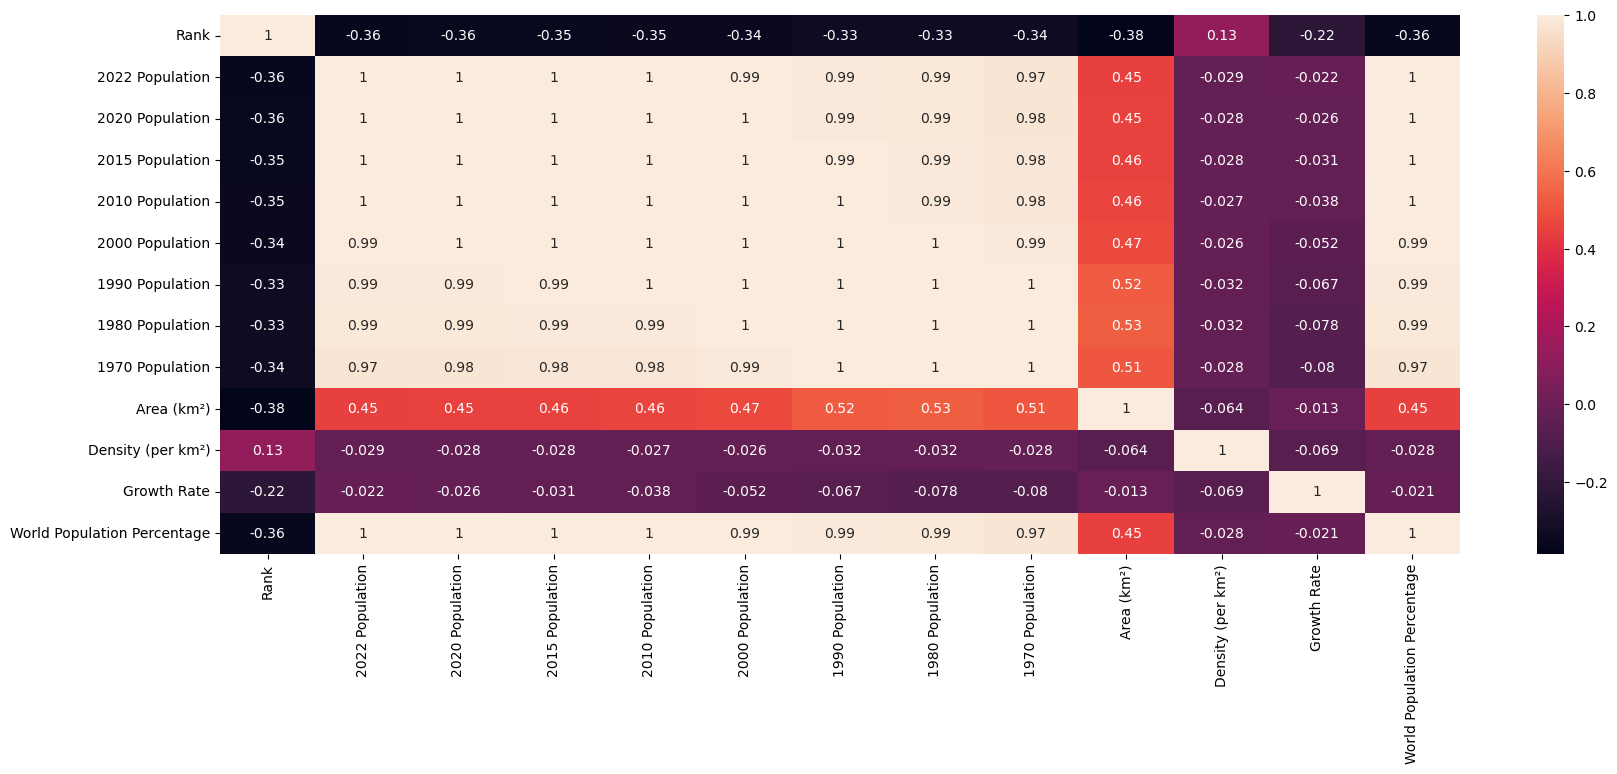

In [48]:
#It's not very readable so we can display this correlation dataframe in a Heatmap using seaborn library sns.heatmap 
# annot=True displays the correlation values in each cell
sns.heatmap(numeric_df.corr(),annot =True)
# Set the figure size to be larger (20 inches wide, 7 inches tall) for better readability
plt.rcParams['figure.figsize']=(20,7)
plt.show()
#The correlations with populations of different decades are almost 1 obviously
#There is an average 0.5 correlation between population and country area

In [56]:
# Let's look at the world population by Continent then sort the Continents by their 2022 Population 
# Specify only numeric columns when calculating mean with numeric_only=True
dfc=df.groupby('Continent').mean(numeric_only=True).sort_values(by='2022 Population', ascending=False)
dfc

# Option 2: If you need to calculate mean for specific columns
# Replace 'column1', 'column2' with your actual numeric column names
#df.groupby('Continent')[['column1', 'column2']].mean()

# Option 3: Convert specific columns to numeric first (if they contain numbers stored as strings)
# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')
# Then run your original groupby
# df.groupby('Continent').mean()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
Continent,,,,,,,,,,,,,
Asia,77.56,"96,327,387.31","94,955,134.37","89,165,003.64","89,087,770.00","80,580,835.11","48,639,995.33","40,278,333.33","43,839,877.83","642,762.82","1,025.02",1.01,1.18
South America,97.57,"31,201,186.29","30,823,574.50","29,509,599.71","26,789,395.54","25,015,888.69","21,224,743.93","17,270,643.29","13,781,939.71","1,301,302.85",20.97,1.01,0.39
Africa,92.16,"25,455,879.68","23,871,435.26","21,419,703.57","18,898,197.31","14,598,365.95","11,376,964.52","8,586,031.98","6,567,175.27","537,879.30",126.41,1.02,0.31
Europe,124.50,"15,055,371.82","14,915,843.92","15,027,454.12","14,712,278.68","14,817,685.71","14,785,203.94","14,200,004.52","13,118,479.82","460,208.22",663.32,1.00,0.19
North America,160.93,"15,007,403.40","14,855,914.82","14,259,596.25","13,568,016.28","12,151,739.60","10,531,660.62","9,207,334.03","7,885,865.15","606,104.45",272.49,1.00,0.19
Oceania,188.52,"2,046,386.32","1,910,148.96","1,756,664.48","1,613,163.65","1,357,512.09","1,162,774.87","996,532.17","846,968.26","370,220.91",132.54,1.01,0.02


<Axes: xlabel='Continent'>

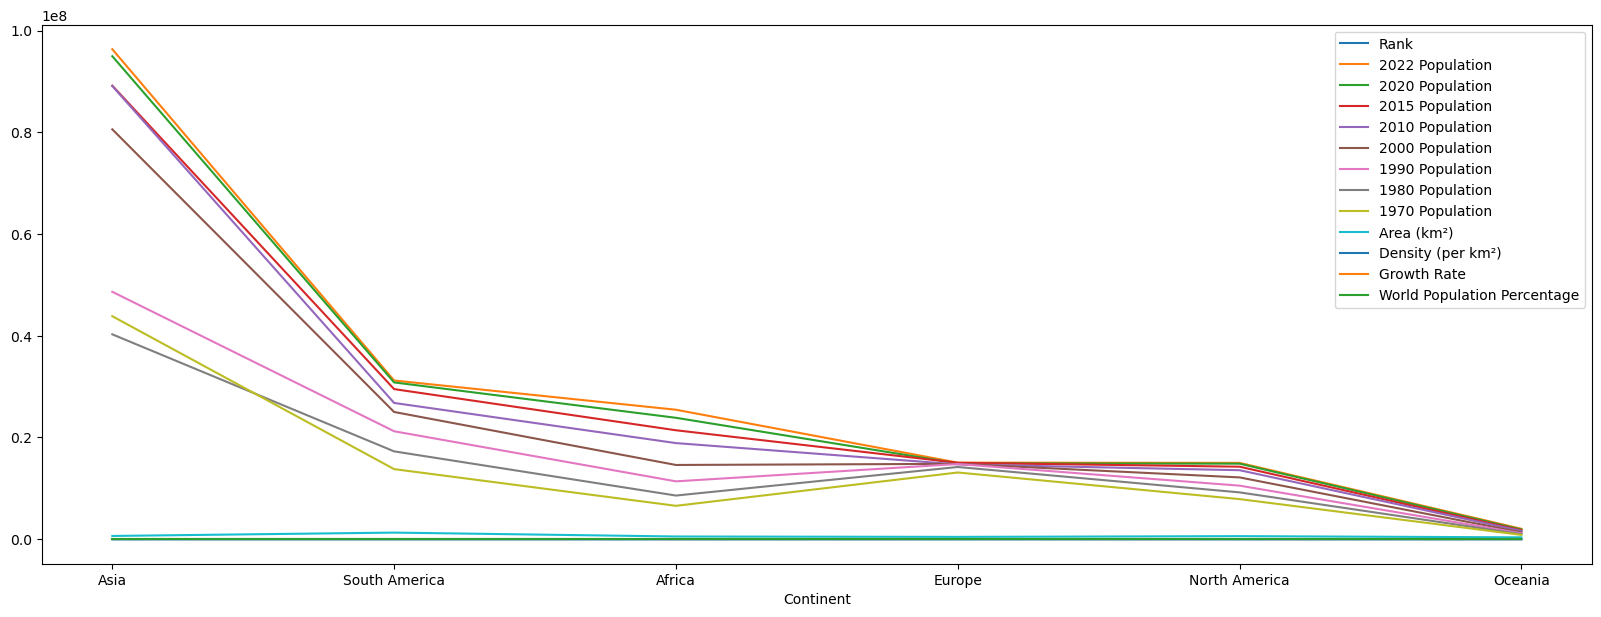

In [61]:
dfc.plot()

In [64]:
# Reverse the order of columns in the DataFrame
# This creates a new DataFrame with columns in reverse order without modifying the original
dfc.columns[::-1]
#dfc[dfc.columns[::-1]]

Index(['World Population Percentage', 'Growth Rate', 'Density (per km²)',
       'Area (km²)', '1970 Population', '1980 Population', '1990 Population',
       '2000 Population', '2010 Population', '2015 Population',
       '2020 Population', '2022 Population', 'Rank'],
      dtype='object')

In [65]:
# Transpose the DataFrame 'dfc' to convert rows to columns and columns to rows
# This is useful for changing the orientation of the data for different analysis perspectives
dfc2=df.groupby('Continent')[['1970 Population', '1980 Population', '1990 Population',
       '2000 Population', '2010 Population', '2015 Population',
       '2020 Population', '2022 Population']].mean(numeric_only=True).sort_values(by='2022 Population', ascending=False)
dfc3=dfc2.transpose()
dfc3

Continent,Asia,South America,Africa,Europe,North America,Oceania
1970 Population,"43,839,877.83","13,781,939.71","6,567,175.27","13,118,479.82","7,885,865.15","846,968.26"
1980 Population,"40,278,333.33","17,270,643.29","8,586,031.98","14,200,004.52","9,207,334.03","996,532.17"
1990 Population,"48,639,995.33","21,224,743.93","11,376,964.52","14,785,203.94","10,531,660.62","1,162,774.87"
2000 Population,"80,580,835.11","25,015,888.69","14,598,365.95","14,817,685.71","12,151,739.60","1,357,512.09"
2010 Population,"89,087,770.00","26,789,395.54","18,898,197.31","14,712,278.68","13,568,016.28","1,613,163.65"
2015 Population,"89,165,003.64","29,509,599.71","21,419,703.57","15,027,454.12","14,259,596.25","1,756,664.48"
2020 Population,"94,955,134.37","30,823,574.50","23,871,435.26","14,915,843.92","14,855,914.82","1,910,148.96"
2022 Population,"96,327,387.31","31,201,186.29","25,455,879.68","15,055,371.82","15,007,403.40","2,046,386.32"


<Axes: >

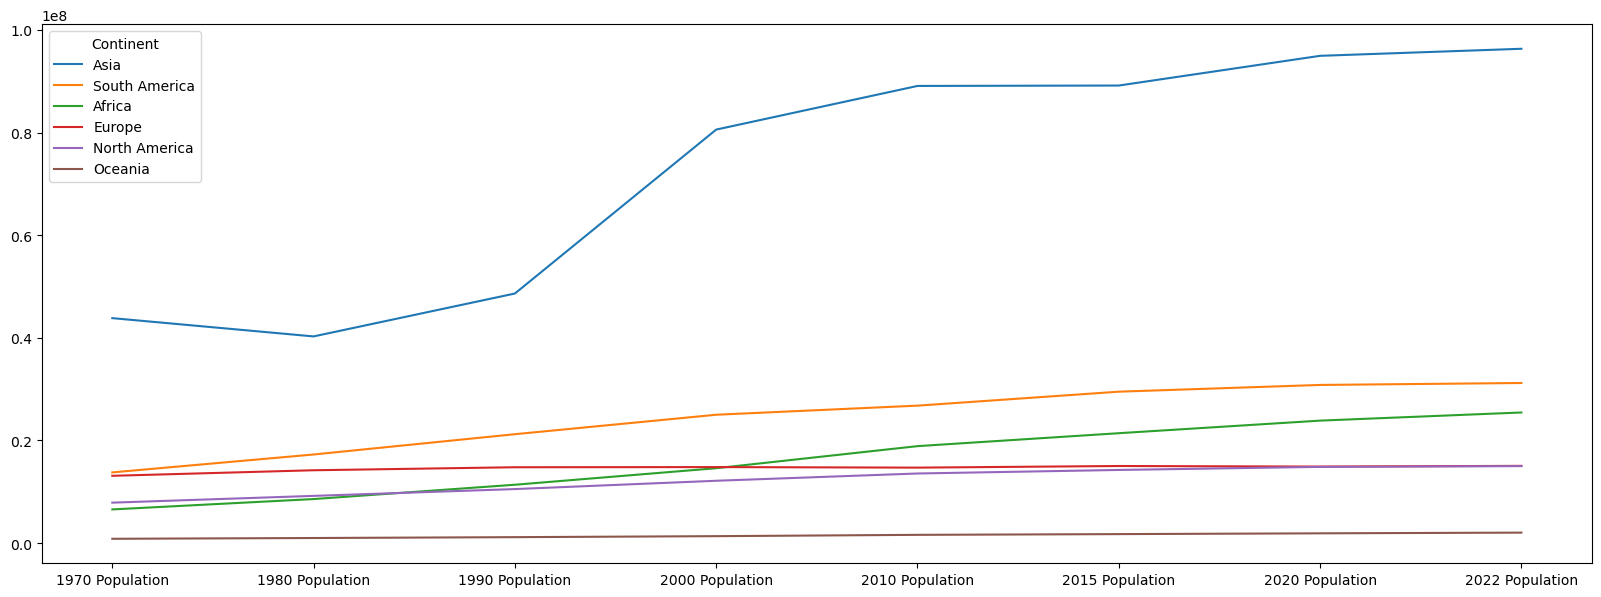

In [66]:
# Create a plot of all columns in the dfc3 DataFrame
# This will generate a line graph with each column represented as a separate line from matplotlib library
dfc3.plot()

<Axes: >

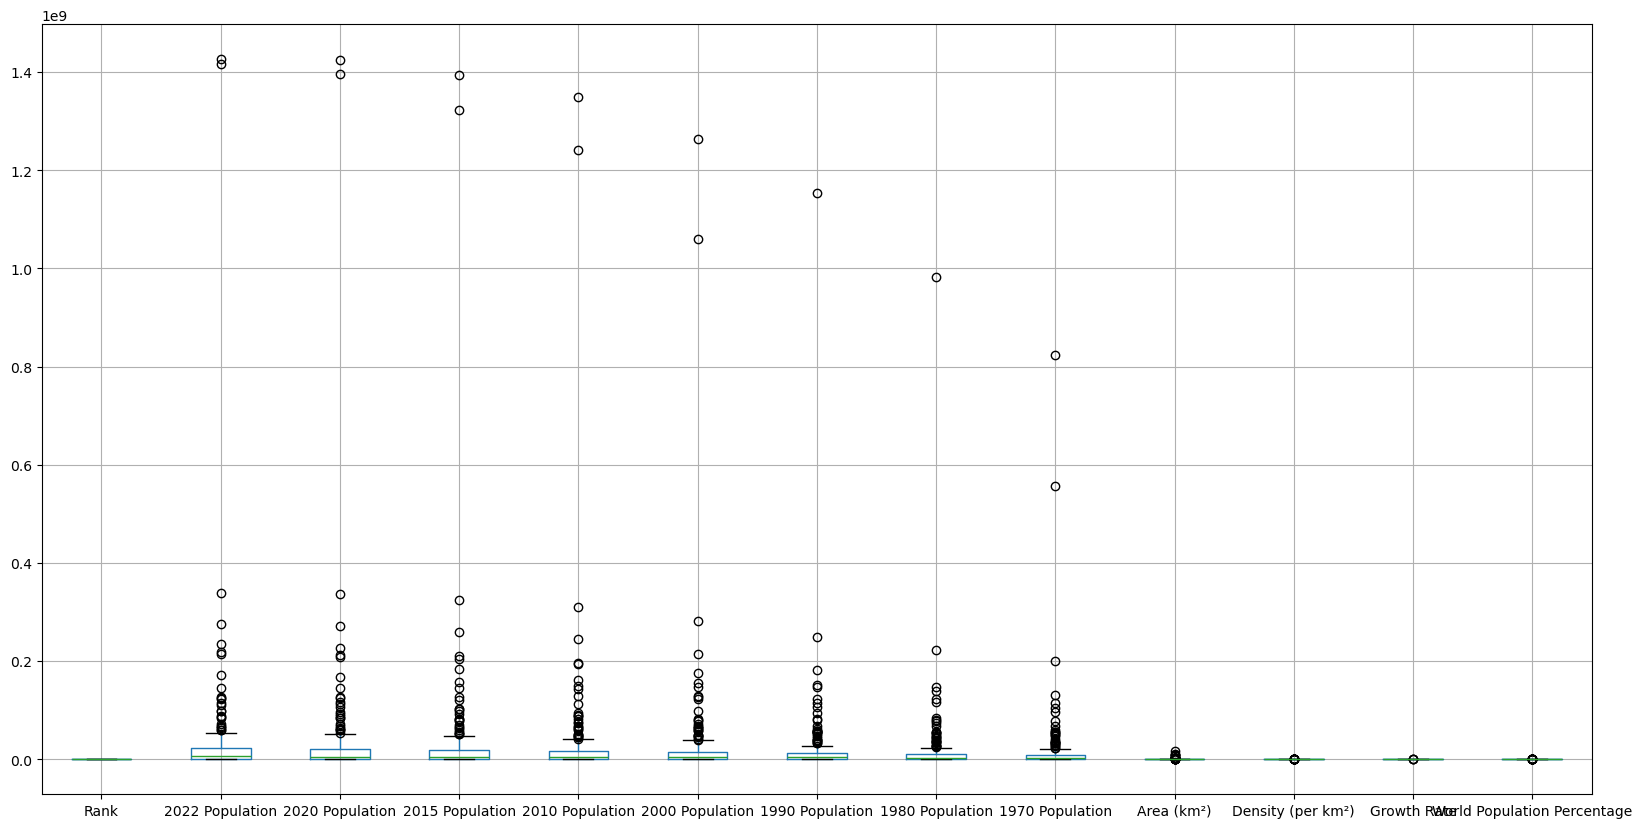

In [69]:
# Create a boxplot visualization of all numeric columns in the dataframe
# The figsize parameter sets the width and height of the figure to 20x10 inches
df.boxplot(figsize=(20,10))
# It is useful to spot the outliers (isolated dots at the top) from a data distribution as well as the mean (below box) and the median 

In [70]:
df.dtypes

Rank                             int64
CCA3                            object
Country                         object
Capital                         object
Continent                       object
2022 Population                float64
2020 Population                float64
2015 Population                float64
2010 Population                float64
2000 Population                float64
1990 Population                float64
1980 Population                float64
1970 Population                float64
Area (km²)                     float64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

In [72]:
# Select only the columns with float data type from the dataframe
# If you need aggregations on your dataframe like with numeric_df 
df.select_dtypes(include='float')

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,"41,128,771.00","38,972,230.00","33,753,499.00","28,189,672.00","19,542,982.00","10,694,796.00","12,486,631.00","10,752,971.00","652,230.00",63.06,1.03,0.52
1,"2,842,321.00","2,866,849.00","2,882,481.00","2,913,399.00","3,182,021.00","3,295,066.00","2,941,651.00","2,324,731.00","28,748.00",98.87,1.00,0.04
2,"44,903,225.00","43,451,666.00","39,543,154.00","35,856,344.00","30,774,621.00","25,518,074.00","18,739,378.00","13,795,915.00","2,381,741.00",18.85,1.02,0.56
3,"44,273.00","46,189.00","51,368.00","54,849.00","58,230.00","47,818.00","32,886.00","27,075.00",199.00,222.48,0.98,0.00
4,"79,824.00","77,700.00","71,746.00","71,519.00","66,097.00","53,569.00","35,611.00","19,860.00",468.00,170.56,1.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
229,"11,572.00","11,655.00","12,182.00","13,142.00","14,723.00","13,454.00","11,315.00","9,377.00",142.00,81.49,1.00,0.00
230,"575,986.00","556,048.00","491,824.00","413,296.00","270,375.00","178,529.00","116,775.00","76,371.00","266,000.00",2.17,1.02,0.01
231,"33,696,614.00","32,284,046.00","28,516,545.00","24,743,946.00","18,628,700.00","13,375,121.00","9,204,938.00","6,843,607.00","527,968.00",63.82,1.02,0.42
232,"20,017,675.00","18,927,715.00",NaN,"13,792,086.00","9,891,136.00","7,686,401.00","5,720,438.00","4,281,671.00","752,612.00",26.60,1.03,0.25
